# Machine Learning Assignment 2

### Assignment Objective:

In this assignment You will learn how to use all machine learning algorthms learned so far, this includes: KNN, Decision Tree, Random Forest (Bagging), Boosting (AdaBoost and XGBoost)

The dataset is for predicting lung diseases. The target is the last column "Level" that is a discrete value 'Low', 'Medium', 'High'.

Remember you want to find the best model that is a model where difference between training accuracy and testing accuracy are closest to each other.

## Import libraries:

In [121]:
# Import all libraries needed here:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

## Read your dataset

In [122]:
cancer_data = pd.read_csv('datasets/cancer.csv')
cancer_data.dropna(axis = 0, inplace=True)

cancer_data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


## Convert target from Categorical to int code:
The target variable is categorical values "Low", "Medium", "High". Convert the target from categorical to int coding using the LabelEncoder method. The target should be: 0 (means Low), 1 (means Medium), or 2 (means High).

In [123]:
from sklearn.preprocessing import LabelEncoder

scale_mapper = {"Low":0, "Medium":1, "High":2}
temp = cancer_data['Level'].replace(scale_mapper)
temp_column = pd.DataFrame(temp)
temp_column.columns = ['Level_enc']
cancer_data = pd.concat([cancer_data, temp_column], axis = 1)
cancer_data.drop(columns=['Level'], inplace=True)

# le = LabelEncoder()
# cancer_data["Level_enc"] = le.fit_transform(cancer_data["Level"])
# cancer_data.drop(columns=["Level"], inplace=True)

cancer_data


C:\Users\redpe\AppData\Local\Temp\ipykernel_15648\930559413.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = cancer_data['Level'].replace(scale_mapper)


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level_enc
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,2
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,2
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,2
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,2
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,2
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2


## Check for missing values

In [124]:
cancer_data.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level_enc                   0
dtype: int64

## Check for outliers:

In [125]:
# using standard deviation method.
def find_outliers (dataColumn):
  outliers=[]
  data_std = dataColumn.std()
  data_mean = dataColumn.mean()
  cutoff = data_std * 3
  lower = data_mean - cutoff
  upper = data_mean + cutoff

  for d in dataColumn:
   if d > upper or d < lower:
    outliers.append(d) # save outlier value
  return outliers

for col in cancer_data.columns[2:]: 
  outlier = find_outliers(cancer_data[col])
  print(outlier)
  if outlier != []:
    for d in outlier:
      cancer_data = cancer_data[cancer_data[col] != d]

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


## Data Scaling:

In [129]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_columns = cancer_data.columns[2:26] # scale only the numeric columns
cancer_data[num_columns] = scaler.fit_transform(cancer_data[num_columns])


## Extract features X and target y from the dataset:

In [132]:
X = cancer_data.values[:, 2:24]
y = cancer_data.values[:, 25]

y

array([0.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.5, 0.5, 1.0, 1.0, 0.5,
       1.0, 0.0, 0.5, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5,
       0.5, 0.5, 1.0, 0.5, 1.0, 1.0, 0.5, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5,
       0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.5, 1.0, 1.0, 1.0,
       0.0, 0.0, 0.5, 0.5, 1.0, 1.0, 0.5, 1.0, 0.0, 0.5, 0.5, 1.0, 1.0,
       0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0, 1.0,
       0.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.

## Split X and y into X_train, X_test, y_train, y_test

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

## KNN:
Use KNN and find the best K-neighbor value:

In [163]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

for k in range(1, 11):
    knntest = KNeighborsRegressor(n_neighbors=k)
    knntest.fit(X_train, y_train)
    y_pred = knntest.predict(X_test)
    acc =  r2_score(y_pred, y_test)
    print ('Accuracy =', acc*100, 'neighbors =', k, '\n')
    


    

Accuracy = 100.0 neighbors = 1 

Accuracy = 100.0 neighbors = 2 

Accuracy = 100.0 neighbors = 3 

Accuracy = 100.0 neighbors = 4 

Accuracy = 100.0 neighbors = 5 

Accuracy = 100.0 neighbors = 6 

Accuracy = 99.8464608064339 neighbors = 7 

Accuracy = 99.47791088413419 neighbors = 8 

Accuracy = 98.98201512932884 neighbors = 9 

Accuracy = 98.41800099834889 neighbors = 10 



## Decision Tree
Use decision tree and find the best max depth value:

Accuracy = 99.88625 depth = 1 

Accuracy = 99.9725 depth = 2 

Accuracy = 99.97375 depth = 3 

Accuracy = 100.0 depth = 4 

Accuracy = 100.0 depth = 5 

Accuracy = 100.0 depth = 6 

Accuracy = 100.0 depth = 7 

Accuracy = 100.0 depth = 8 

Accuracy = 100.0 depth = 9 

Accuracy = 100.0 depth = 10 

Accuracy = 100.0 depth = 11 



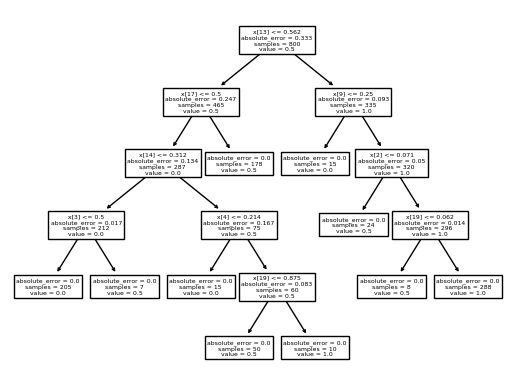

In [149]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score

for d in range(1, 12):
    model = DecisionTreeRegressor(criterion='absolute_error', max_depth=d)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_tree(model)
    acc = r2_score(y_pred, y_test)
    print('Accuracy =', acc*100, 'depth =', d, '\n')



## Random Forest:
Use random forest to find the best number of estimators and max depth:

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
for d in range(1, 11):
    clf = RandomForestRegressor(max_depth=d, random_state=0)
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    acc = r2_score(y_pred, y_test)
    print('Accuracy =', acc*100, 'depth =', d, '\n')


Accuracy = 38.449038483462914 depth = 1 

Accuracy = 80.4348731746023 depth = 2 

Accuracy = 95.0260953627193 depth = 3 

Accuracy = 99.62324152069027 depth = 4 

Accuracy = 99.99999868302652 depth = 5 

Accuracy = 100.0 depth = 6 

Accuracy = 100.0 depth = 7 

Accuracy = 100.0 depth = 8 

Accuracy = 100.0 depth = 9 

Accuracy = 100.0 depth = 10 



## AdaBoost
Use AdaBoost with none in the estimator parameter to find the best value for number of estimators. Use learning_rate = 0.01, Check the website: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


In [166]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
for a in range(1, 50):
    ada = AdaBoostRegressor(estimator=None, n_estimators=a,learning_rate=0.01)
    ada.fit(X, y)
    y_pred = ada.predict(X_test)
    acc = r2_score(y_pred, y_test)
    print('Accuracy =', acc*100, 'estimators =', a, '\n')


Accuracy = 90.24103251565457 estimators = 1 

Accuracy = 90.06383839690875 estimators = 2 

Accuracy = 97.98378990969023 estimators = 3 

Accuracy = 94.41701898788449 estimators = 4 

Accuracy = 92.51557099510688 estimators = 5 

Accuracy = 97.62194243525052 estimators = 6 

Accuracy = 95.0316819624101 estimators = 7 

Accuracy = 93.6389051756747 estimators = 8 

Accuracy = 97.90083832344996 estimators = 9 

Accuracy = 97.62258576394296 estimators = 10 

Accuracy = 94.34146655781196 estimators = 11 

Accuracy = 93.82786773102877 estimators = 12 

Accuracy = 96.93244196292 estimators = 13 

Accuracy = 91.48070765443744 estimators = 14 

Accuracy = 94.33233085781373 estimators = 15 

Accuracy = 97.85183688341547 estimators = 16 

Accuracy = 97.90017715511279 estimators = 17 

Accuracy = 97.89138451903855 estimators = 18 

Accuracy = 92.05845270725207 estimators = 19 

Accuracy = 97.70514279371024 estimators = 20 

Accuracy = 97.74863470197471 estimators = 21 

Accuracy = 94.1385431106210

## XGBoost:
Use the slides that uses XGBoost. To install XGBoost, use: pip install xgboost

